# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


Boxplots of standardized attributes before removing outliers:


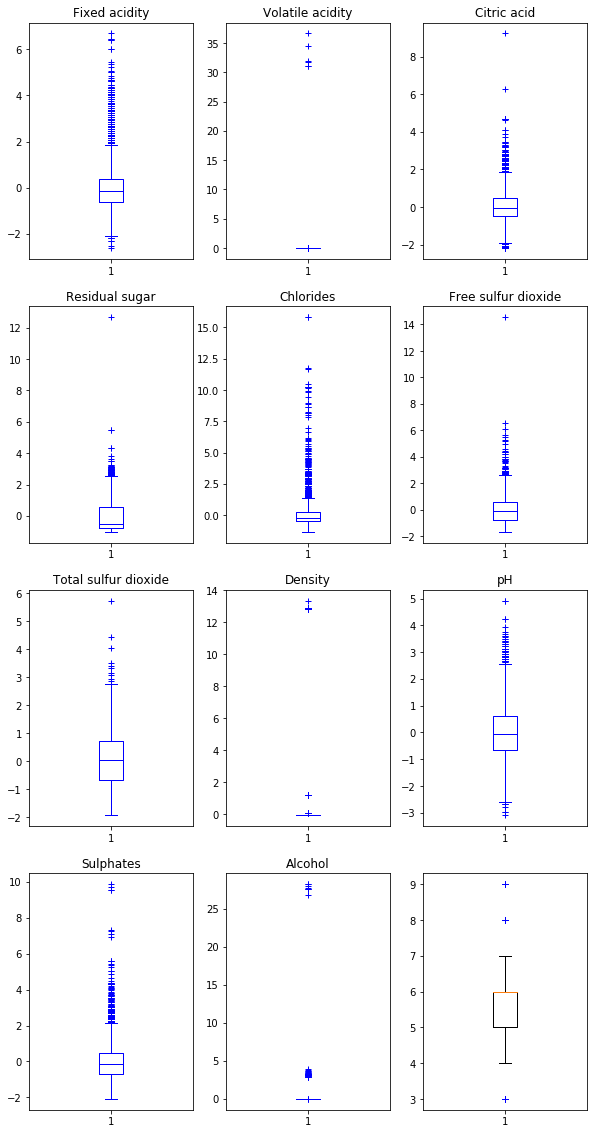



-------------------------------


Histograms of standardized attributes before removing outliers:


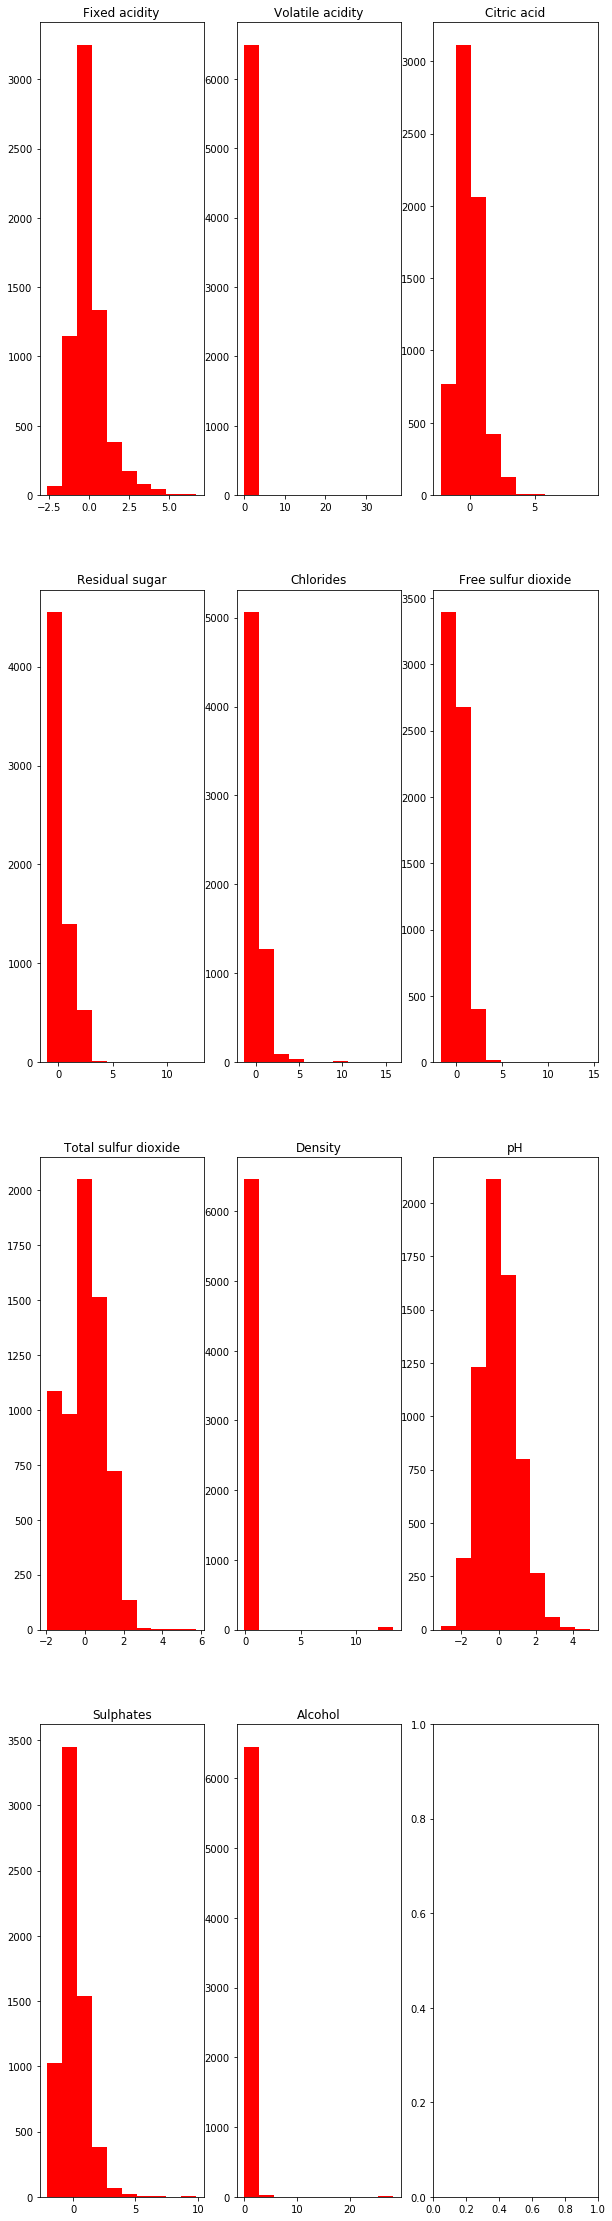



-------------------------------


Boxplots of standardized attributes after removing outliers:


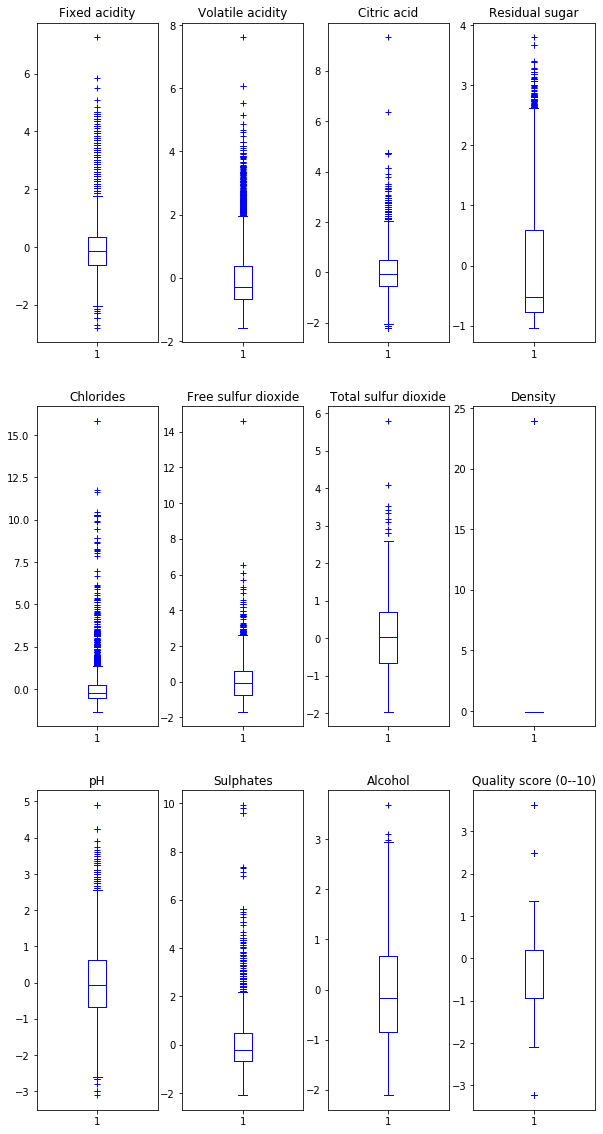



-------------------------------


Histograms of standardized attributes after removing outliers:


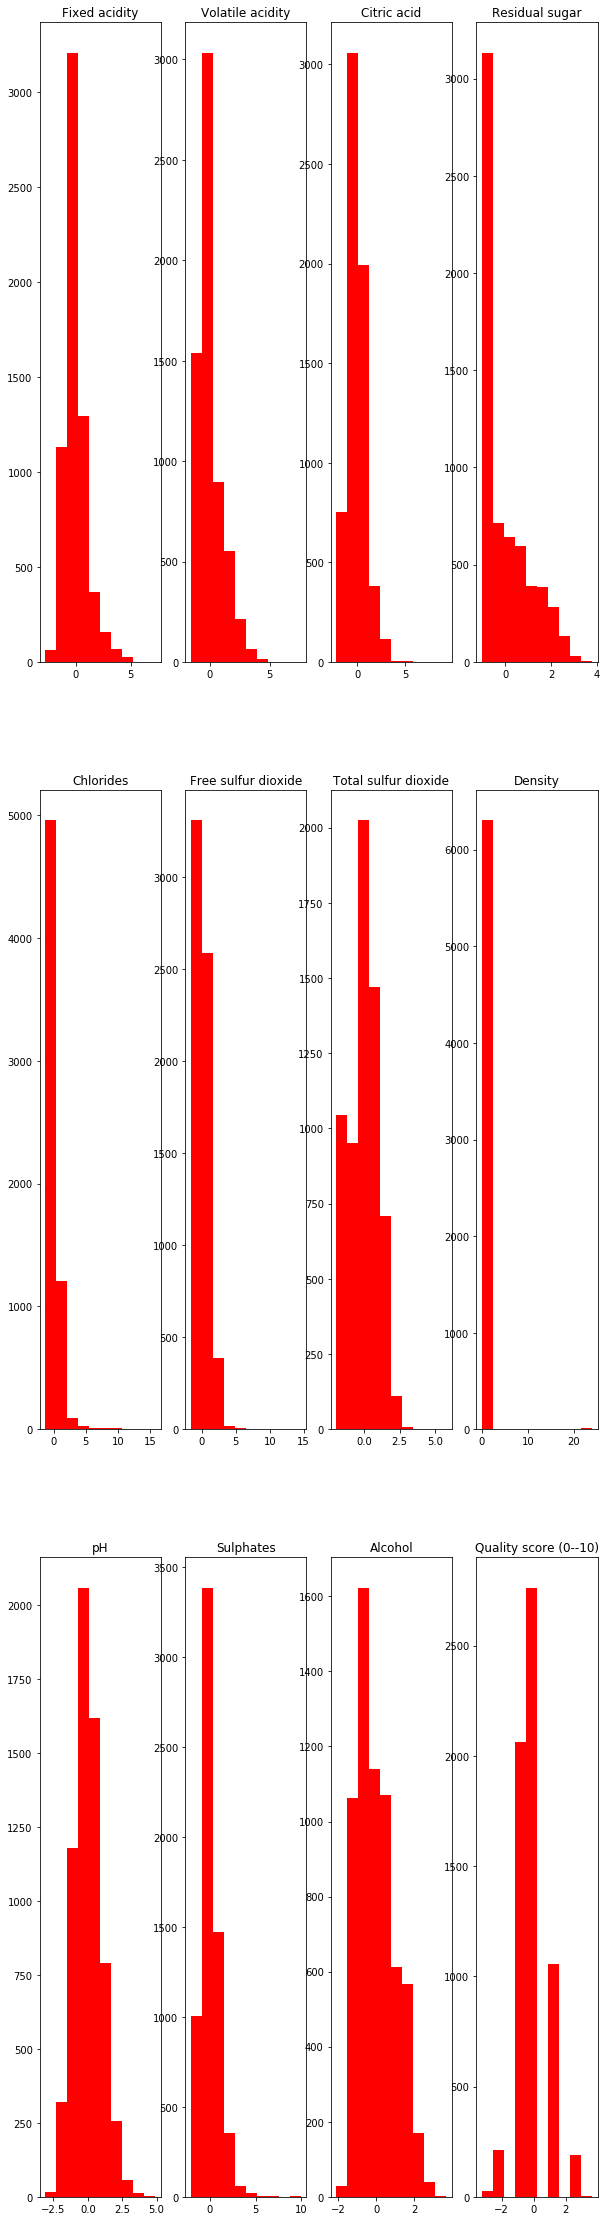

In [14]:
from scipy import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

### loading the data
data = io.loadmat('Data/wine.mat')
### selecting the values from the dictionary
values  = data['X']
### selecting the attribute names from the dictionary
attribute_names = data['attributeNames'][0]

#print(np.shape(values))

values = np.array(values)
###c reating a copy for the second part of the exercise
values_copy = values
ratings = values[:,11]
### calculating the zscore for columns
values = np.apply_along_axis(zscore,0,values[:,:11])

#print(np.shape(values))
### creating the subplot figure for the boxplots of the attributes after before outliers
fig1, ax1 = plt.subplots(nrows=4, ncols=3)
i = 0
fig1.set_figheight(20)
fig1.set_figwidth(10)

### iterating on the created subplot's returned 'axes' object
print("Boxplots of standardized attributes before removing outliers:")
for row in ax1:
    for col in row:
        if i == 11:
            col.boxplot(ratings, sym = "b+")
            break
            
        bp = col.boxplot(values[:,i], sym = "b+")
        color = "blue"
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)
        col.set_title(attribute_names[i][0])
        i = i + 1
        
            
     
        
plt.show()
        
print("\n")
print("-------------------------------")
print("\n")
        
### creating the subplot figure for the histograms of the attributes before removing outliers
print("Histograms of standardized attributes before removing outliers:")
fig2, ax2 = plt.subplots(nrows=4, ncols=3)
i = 0
fig2.set_figheight(40)
fig2.set_figwidth(10)

### iterating on the created subplot's returned 'axes' object
for row in ax2:
    for col in row:
        color = "red"
        col.hist(values[:,i],color = color)
        col.set_title(attribute_names[i][0])
        i = i + 1
        if i == 11:
            break

plt.show()

print("\n")
print("-------------------------------")
print("\n")

### getting indices from volatile_acidity, alcohol and density columns where the value is ten times bigger than the mean of the column
vol = np.nonzero(values_copy[:,1] > 10* np.mean(values_copy[:,1]))
alc = np.nonzero(values_copy[:,10] > 10* np.mean(values_copy[:,10]))
den = np.nonzero(values_copy[:,7] > 10* np.mean(values_copy[:,7]))

### create one array of indices
indices  = np.concatenate((vol[0],alc[0],den[0]))

### delete certain rows according to the indices array
values = np.delete(values_copy,indices,0)   
### standardizing the data after removing outliers
values = np.apply_along_axis(zscore,0,values)

### creating the subplot figure for the boxplots of the attributes after removing outliers
fig3, ax3 = plt.subplots(nrows=3, ncols=4)
i = 0
fig3.set_figheight(20)
fig3.set_figwidth(10)

print("Boxplots of standardized attributes after removing outliers:")
###iterating on the created subplot's returned 'axes' object
for row in ax3:
    for col in row:
        bp = col.boxplot(values[:,i], sym = "b+")
        color = "blue"
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)
        col.set_title(attribute_names[i][0])
        i = i + 1
        
plt.show()
        
print("\n")
print("-------------------------------")
print("\n")
        
###creating the subplot figure for the histograms of the attributes after removing outliers
print("Histograms of standardized attributes after removing outliers:")
fig4, ax4 = plt.subplots(nrows=3, ncols=4)
i = 0
fig4.set_figheight(40)
fig4.set_figwidth(10)

###iterating on the created subplot's returned 'axes' object
for row in ax4:
    for col in row:
        color = "red"
        col.hist(values[:,i],color = color)
        col.set_title(attribute_names[i][0])
        i = i + 1

plt.show()


----
Removing outliers makes it easier to better visualize the data, however, new outliers can be noticed on the boxplots.

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----

Variables on different scales have to be standardized otherwise features with higher values become more prominent i.e. the weights of these variables are higher in the model.
With standardization we can compare different features with the same distribution.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Correlation between Fixed acidity and human ratings
Correlation coefficient: -0.07774916000776476
Scatterplot of Fixed acidity against humam ratings:


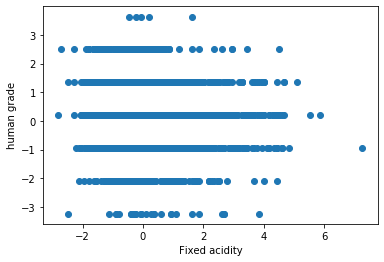



Correlation between Volatile acidity and human ratings
Correlation coefficient: -0.2633670297293052
Scatterplot of Volatile acidity against humam ratings:


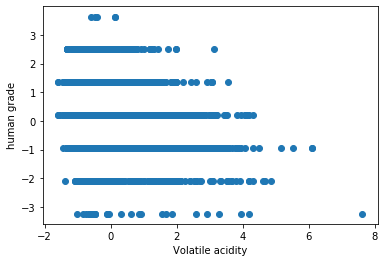



Correlation between Citric acid and human ratings
Correlation coefficient: 0.08853450718722032
Scatterplot of Citric acid against humam ratings:


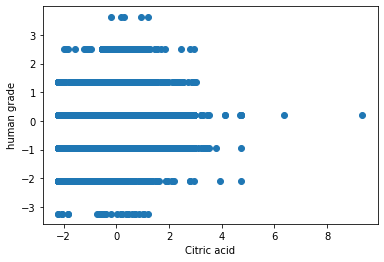



Correlation between Residual sugar and human ratings
Correlation coefficient: -0.033073505389744184
Scatterplot of Residual sugar against humam ratings:


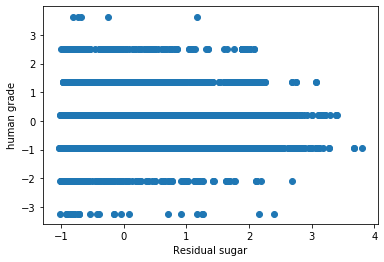



Correlation between Chlorides and human ratings
Correlation coefficient: -0.199808550032187
Scatterplot of Chlorides against humam ratings:


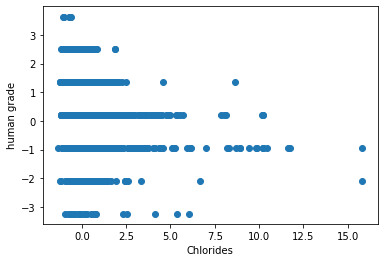



Correlation between Free sulfur dioxide and human ratings
Correlation coefficient: 0.05481627304560331
Scatterplot of Free sulfur dioxide against humam ratings:


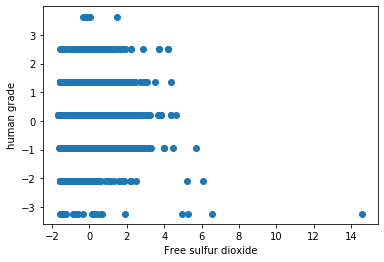



Correlation between Total sulfur dioxide and human ratings
Correlation coefficient: -0.04026143394340129
Scatterplot of Total sulfur dioxide against humam ratings:


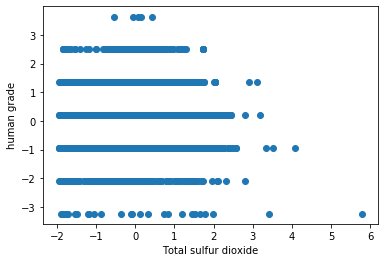



Correlation between Density and human ratings
Correlation coefficient: -0.026343211766894463
Scatterplot of Density against humam ratings:


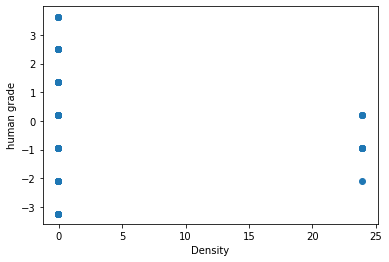



Correlation between pH and human ratings
Correlation coefficient: 0.020288641958460522
Scatterplot of pH against humam ratings:


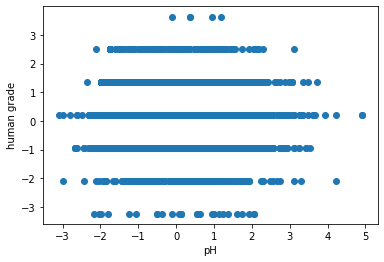



Correlation between Sulphates and human ratings
Correlation coefficient: 0.036661559435075194
Scatterplot of Sulphates against humam ratings:


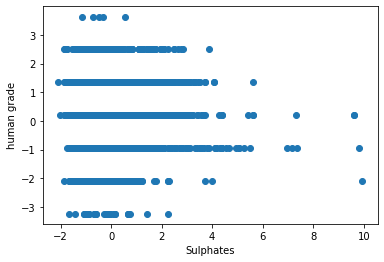



Correlation between Alcohol and human ratings
Correlation coefficient: 0.4492414292028102
Scatterplot of Alcohol against humam ratings:


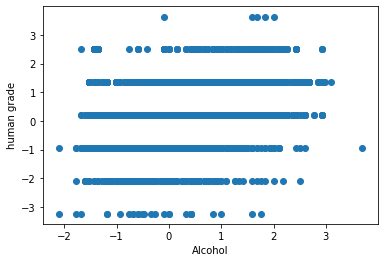

In [2]:
from scipy.stats import pearsonr

ratings = values[:,11]

for i in range(11):
    attr = values[:,i]
    print("Correlation between {} and human ratings".format(attribute_names[i][0]))
    print("Correlation coefficient:",pearsonr(attr,ratings)[0])
    
    print("Scatterplot of {} against humam ratings:".format(attribute_names[i][0]))
    plt.scatter(attr,ratings)
    plt.xlabel(f'{attribute_names[i][0]}')
    plt.ylabel('human grade')
    plt.show()
    print("\n")

----

There is a strong correlation between alcohol levels and humas ratings which makes sense. High alcohol level and a little bit of citric acid make a good quality wine.

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


This is how the first 10 digits of class 0 and 1 look like:



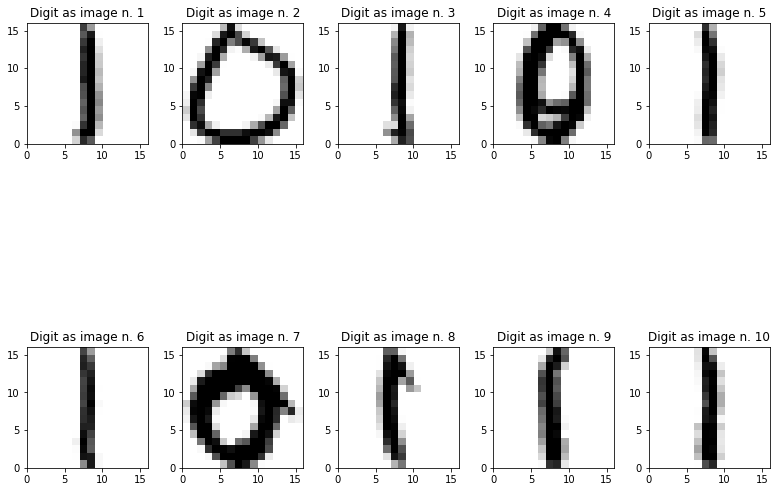

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
import numpy as np
%matplotlib inline

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
all_X = traindata[:,1:]
all_y = traindata[:,0]

#select only elements of class 0 and 1, removing elements from class 2 to 9
y = all_y[all_y <= 1]
X = all_X[all_y <= 1]

# Visualize the i'th digit as an image
fig, ax = plt.subplots(2,5,figsize=(11,11))
ax = ax.ravel()

print("This is how the first 10 digits of class 0 and 1 look like:\n")

for i in range(0,10):
    I = np.reshape(X[i,:],(16,16))
    ax[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[i].set_title('Digit as image n. ' + str(i+1));

plt.tight_layout()
plt.show()

And this is how the reconstructed images look like:



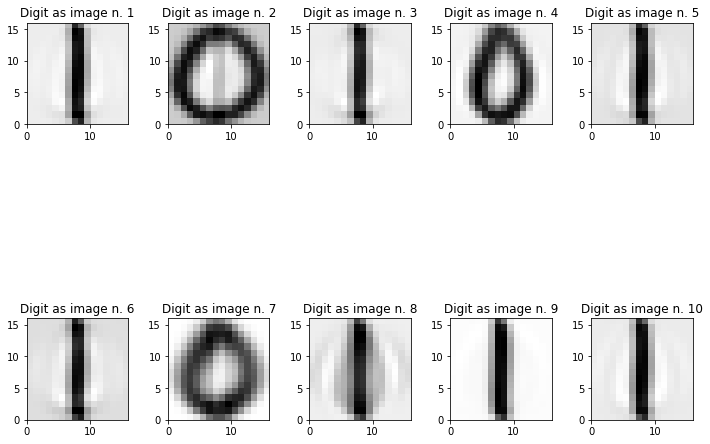

In [4]:
#apply the PCA on X
mean = np.mean(X, axis=0)
X_mean = X - mean

U, S, VT = np.linalg.svd(X_mean)
V = VT.T

#project the data on the first 4 PCs
Z = np.dot(X_mean, V[:, :4])

#reconstruct the data
W = np.dot(Z, V[:, :4].T) + mean

fig, ax = plt.subplots(2,5,figsize=(10,10))
ax = ax.ravel()

print("And this is how the reconstructed images look like:\n")

for i in range(0,10):
    I = np.reshape(W[i,:],(16,16))
    ax[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[i].set_title('Digit as image n. ' + str(i + 1));

plt.tight_layout()
plt.show()

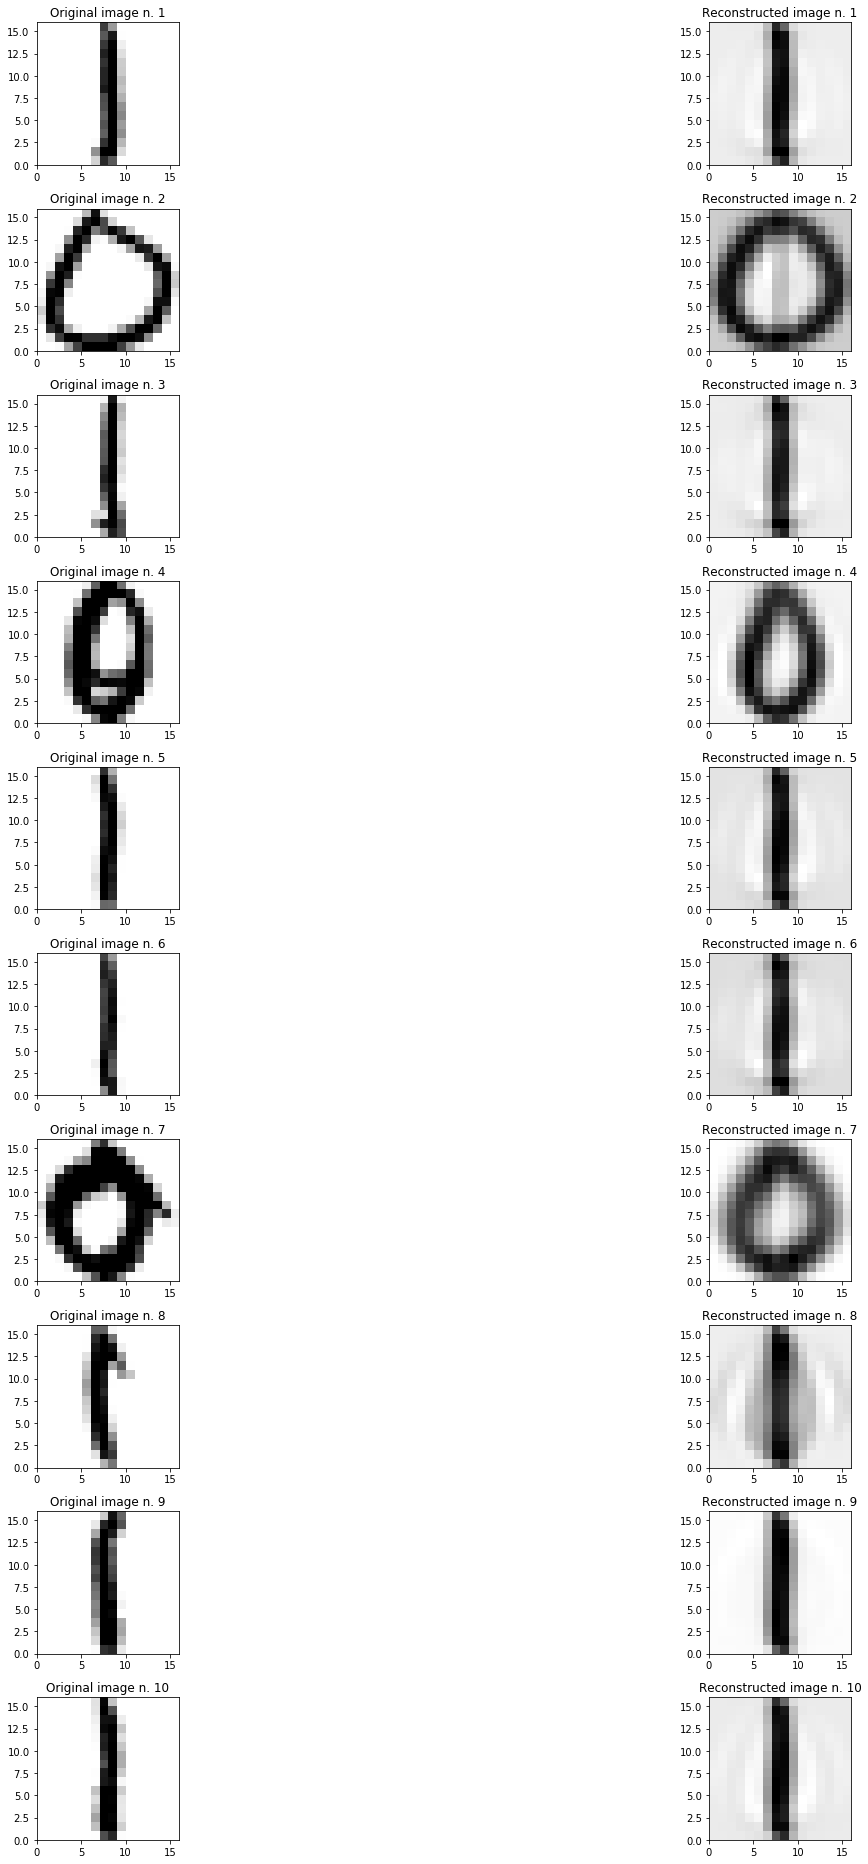

In [5]:
fig, ax = plt.subplots(10,2,figsize=(26,26))

for i in range(0,10):
    Itrue = np.reshape(X[i,:],(16,16))
    Ireconst = np.reshape(W[i,:],(16,16))
    ax[i][0].imshow(Itrue, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[i][0].set_title('Original image n. ' + str(i + 1));
    ax[i][1].imshow(Ireconst, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[i][1].set_title('Reconstructed image n. ' + str(i + 1));

plt.tight_layout()
plt.show()

----

As we can see the results are really good keeping just only 4 PCs instead of the 256 we had initially, with reconstructed images that are really similar to the original one and sometimes even better. That's because if we keep only 4 PCs we are losing least significant information's part and, with that, also the "noise" present in the images: on the left side zeros and ones are not perfectly drawn (they are hand made) and they have some imprecisions that are not as important as the shape of the image for the PCA. 
Eventually the reconstructed images are smoother than the original, but we have lost a lot of information from the beginning and that is the cause of the blurred effect and also the weird-gray background we can see (the last one is easable fixable with a filter).

----

4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 against each other


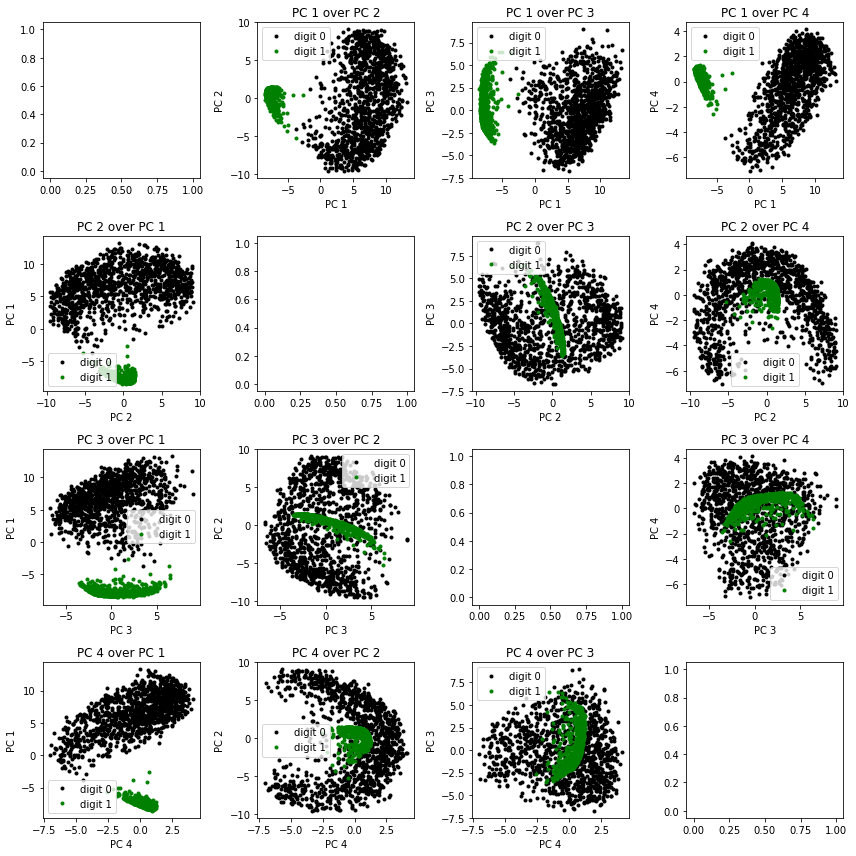

In [6]:
print("4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 against each other")

fig, pc = plt.subplots(4,4,figsize=(12,12))

for i in range(0,4):
     for j in range(0,4):
        if(i == j):
            pc[i, i].plot()
        else:
            pc[i][j].plot(Z[y == 0, i],Z[y == 0, j],'k.', label="digit 0")
            pc[i][j].plot(Z[y == 1, i],Z[y == 1, j],'g.', label="digit 1")
            pc[i][j].set_title(f'PC {i+1} over PC {j+1}')
            pc[i][j].set_xlabel(f'PC {i+1}')
            pc[i][j].set_ylabel(f'PC {j+1}')
            pc[i][j].legend()


plt.tight_layout()
plt.show()

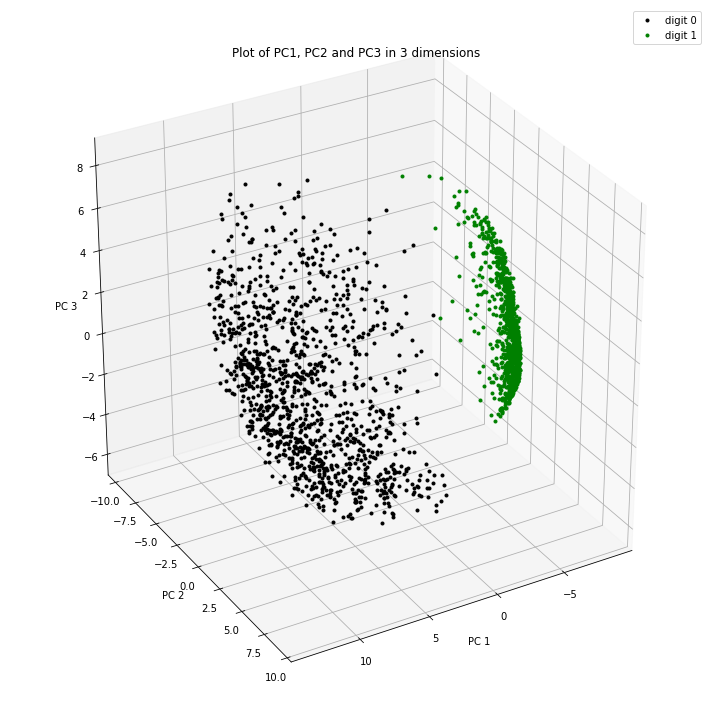

In [7]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(Z[y == 0, 0], Z[y == 0, 1], Z[y == 0, 2],'k.', label="digit 0")
ax.plot(Z[y == 1, 0], Z[y == 1, 1], Z[y == 1, 2],'g.', label="digit 1")
ax.set_title('Plot of PC1, PC2 and PC3 in 3 dimensions')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend()

#rotate the graph
ax.view_init(azim=60)


plt.tight_layout()
plt.show()


----

After all the scatter plots we have created we can see that there is a clearly distinction between the two classes inside the data. In particular, as it is shown in both the 3d's and 2d's plots, the first principal component is able to split zeros and ones in two different parts alone, while the other 3 components have the points too close to each others to try to split them out.
If we focus on the 2d scatter plots we can notice that PC1 is able to divide the two classes against all the other 3 PCs, but the best result is present in "PC1 against PC4" where there is a visible margin between the dataset of the two classes.

----

----


----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([2,3,6,8,11,18])

mean = np.mean(data)
std = np.std(data)

print("Mean of the population: ", mean)
print("Standard deviation: ", std)

Mean of the population:  8.0
Standard deviation:  5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [9]:
from itertools import combinations

comb_two = combinations(data,2)
print("All possible combinations of 2 values: ")
print("\n")
list_comb_two = list(comb_two)
print(list_comb_two)
print("\n")

comb_four = combinations(data,4)
print("All possible combinations of 4 values: ")
print("\n")
list_comb_four = list(comb_four)
print(list_comb_four)



All possible combinations of 2 values: 


[(2, 3), (2, 6), (2, 8), (2, 11), (2, 18), (3, 6), (3, 8), (3, 11), (3, 18), (6, 8), (6, 11), (6, 18), (8, 11), (8, 18), (11, 18)]


All possible combinations of 4 values: 


[(2, 3, 6, 8), (2, 3, 6, 11), (2, 3, 6, 18), (2, 3, 8, 11), (2, 3, 8, 18), (2, 3, 11, 18), (2, 6, 8, 11), (2, 6, 8, 18), (2, 6, 11, 18), (2, 8, 11, 18), (3, 6, 8, 11), (3, 6, 8, 18), (3, 6, 11, 18), (3, 8, 11, 18), (6, 8, 11, 18)]


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [10]:
from itertools import combinations
comb_two = combinations(data,2)



arr = np.array(list_comb_two)
means_two = np.apply_along_axis(np.mean,1,arr)


means_of_means_two = np.mean(means_two)
print("means_of_means of two elements : ",means_of_means_two)
print("\n")

arr_four = np.array(list_comb_four)
means_four = np.apply_along_axis(np.mean,1,arr_four)

means_of_means_four = np.mean(means_four)
print("means of means of four elements:", means_of_means_four)

means_of_means of two elements :  8.0


means of means of four elements: 8.0


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [11]:
assert means_of_means_two == means_of_means_four == mean
print("The means are equal.")


The means are equal.


----

According to the Central Limit Theorem, taking samples from the same distribution, the means of the samples will be normally distributed. In this case, the sample means will get closer to 8 (population mean) as the sample size increases. For N = 2 and N = 4 the mean is 8, so it verifies the Central Limit Theorem.

----

In [12]:
std_two = np.std(means_two)
std_four = np.std(means_four)

print("Standard deviaton of tuples of two:",std_two)
print("Standard deviaton of tuples of four:",std_four)
print("\n")

pop_std_two_approx = std/np.sqrt(2)
pop_std_four_approx = std/np.sqrt(4)
print("Approximation of two elements:",pop_std_two_approx)
print("Approximation of four elements:",pop_std_four_approx)
print("\n")

M = np.size(data)

better_approx_two =  std/np.sqrt(2) * np.sqrt( (M - 2) / (M-1))
better_approx_four =  std/np.sqrt(4) * np.sqrt( (M - 4) / (M-1))  
print("Better approximation of two elements: ",better_approx_two)
print("Better approximation of four elementst: ",better_approx_four)

Standard deviaton of tuples of two: 3.40587727318528
Standard deviaton of tuples of four: 1.70293863659264


Approximation of two elements: 3.807886552931954
Approximation of four elements: 2.692582403567252


Better approximation of two elements:  3.40587727318528
Better approximation of four elementst:  1.70293863659264


----
The first approximation is less accurate than the second. The second one seems almost exactly the same as the original.

We can also see that second standard deviation (sample of four elements) is lower compared to the first (sample of two elements). With more samples (so bigger N), the standard deviaton gets lower. The reason for this is that the mean with more samples will be closer to the original data's mean.

----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

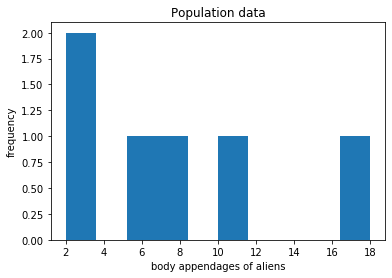

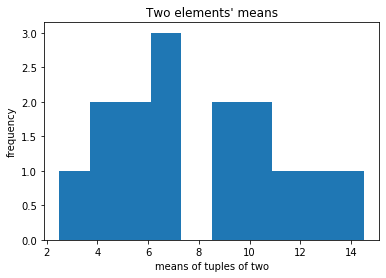

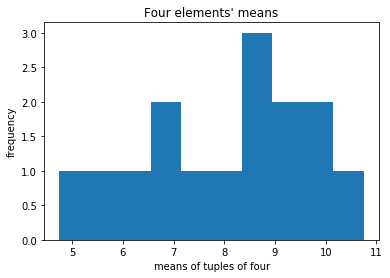

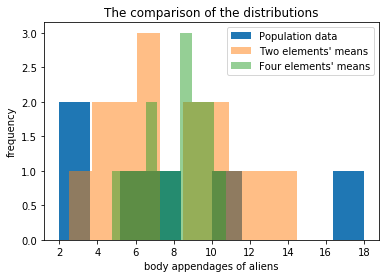

In [13]:
plt.hist(data)
plt.title("Population data")
plt.xlabel("body appendages of aliens")
plt.ylabel("frequency")
plt.show()
plt.hist(means_two)
plt.title("Two elements' means")
plt.xlabel("means of tuples of two")
plt.ylabel("frequency")
plt.show()
plt.hist(means_four)
plt.title("Four elements' means")
plt.xlabel("means of tuples of four")
plt.ylabel("frequency")
plt.show()

plt.hist(data, label="Population data")
plt.hist(means_two, alpha=0.5, label="Two elements' means")
plt.hist(means_four, alpha=0.5, label="Four elements' means")
plt.title("The comparison of the distributions")
plt.xlabel("body appendages of aliens")
plt.ylabel("frequency")
plt.legend()
plt.show()

----
With N increasing, the shape will look like a bell curve because the sample's means are normally distributed.

----